# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nida'an Khafiyya
- **Email:** nidaankhafiyyaakun@gmail.com
- **ID Dicoding:** needkh

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penyewaan sepeda berdasarkan hari dalam seminggu?
- Pertanyaan 2: Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?
- Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

Proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data
Pengumpulan data

In [2]:
# Memuat tabel day dan hour
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

In [3]:
# Menampilkan data dari day_df
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# Menampilkan data dari hour_df
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset berisi informasi harian dan per jam mengenai penyewaan sepeda, termasuk tanggal, hari, dan jam. Selain itu, terdapat juga informasi tentang musim, suhu, cuaca, dan faktor lainnya.
- Dataset terdiri dari 731 baris untuk day_df dan 17.379 baris untuk hour_df.

### Assessing Data
Penilaian data

#### day_df

In [5]:
# Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Memeriksa duplikasi data day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### hour_df

In [8]:
# Menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Memeriksa duplikasi data day_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data kolom dteday pada day_df maupun hour_df masih kurang tepat, yaitu bertipe object. Seharusnya, kolom ini menggunakan tipe data datetime.
- Tidak terdapat data yang hilang atau duplikat pada kedua DataFrame.

### Cleaning Data
Pembersihan data

In [11]:
# Mengganti tipe data pada kolom dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Memeriksa data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# Mengganti tipe data pada kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Memeriksa data day_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data dteday pada day_df dan hour_df telah diubah menjadi datetime.
- Data siap digunakan untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

Proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data 

### Explore day_df

In [13]:
# Mengelompokkan tren penyewaan sepeda berdasarkan hari dalam seminggu, kemudian diurutkan
weekday_bike = day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

# Menampilkan data
weekday_bike

,casual,registered,cnt
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
0,140521,303506,444027


**Keterangan:**
- 0 = Minggu (Sunday)
- 1 = Senin (Monday)
- 2 = Selasa (Tuesday)
- 3 = Rabu (Wednesday)
- 4 = Kamis (Thursday)
- 5 = Jumat (Friday)
- 6 = Sabtu (Saturday)

In [14]:
# Mengelompokkan pengaruh cuaca terhadap jumlah penyewaan sepeda, kemudian diurutkan
season_bike = day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

# Menampilkan data
season_bike

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


**Keterangan:**
- 1 = springer
- 2 = summer
- 3 = fall
- 4 = winter

### Explore hour_df

In [15]:
# Mengelompokkan data berdasarkan jam dan hari kerja
hourly_bike_rentals = hour_df.groupby(["hr", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

# Menampilkan data teratas
hourly_bike_rentals.head()

,hr,workingday,casual,registered,cnt
0,0,0,3829,17055,20884
1,0,1,3546,14700,18246
2,1,0,2876,13111,15987
3,1,1,1833,6344,8177
4,2,0,2371,9752,12123


In [16]:
# Mengelompokkan data berdasarkan jam
hourly_bike = hour_df.groupby(["hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

# Menampilkan data teratas
hourly_bike.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


**Insight:**
- Tren penyewaan sepeda tertinggi berdasarkan hari dalam seminggu terjadi pada hari Jumat.
- Pengaruh cuaca terhadap jumlah penyewaan sepeda tertinggi terjadi pada musim fall (gugur).
- Penyewaan sepeda pada hari kerja dan hari libur menunjukkan jumlah yang berbeda.

## Visualization & Explanatory Analysis

Tahapan yang harus dilakukan sebelum membuat kesimpulan dan mengomunikasikan (draw conclusion & communicate) hasil dari proses analisis yang telah dilakukan

### Pertanyaan 1: Bagaimana tren penyewaan sepeda berdasarkan hari dalam seminggu?

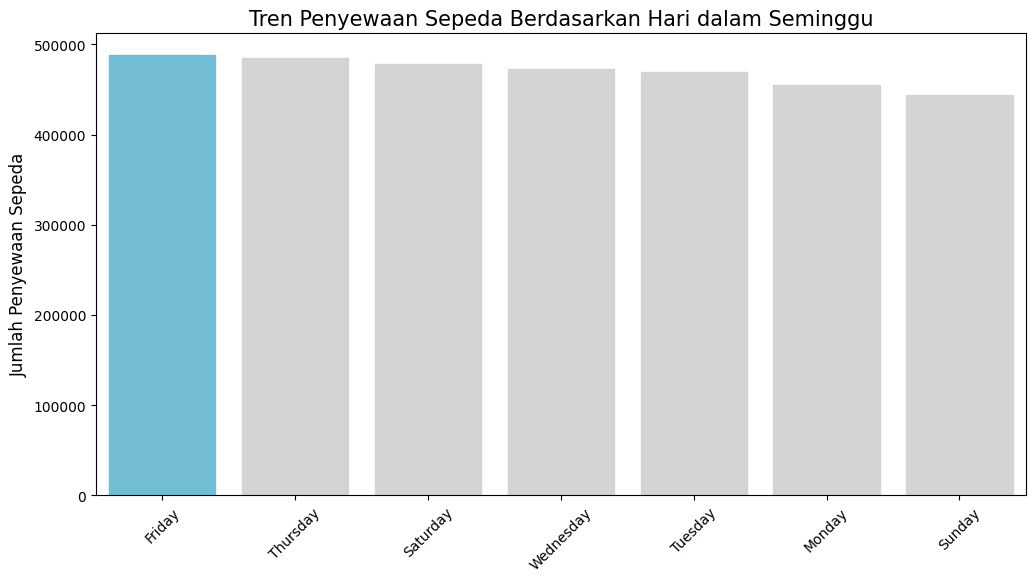

In [17]:
# Membuat salinan dataframe agar tidak mengubah aslinya
weekday_bike_sorted = weekday_bike.sort_values(by="cnt", ascending=False).copy()

# Mapping dari angka hari ke nama hari
weekday_labels = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}

# Menambahkan kolom nama hari ke dataframe
weekday_bike_sorted["weekday_name"] = weekday_bike_sorted.index.map(weekday_labels)

# Membuat ukuran figure
fig, ax = plt.subplots(figsize=(12, 6))

# Warna untuk highlight hari dengan penyewaan tertinggi
colors = ["#D3D3D3"] * 7  # Default semua abu-abu
max_index = weekday_bike_sorted["cnt"].idxmax()  # Cari hari dengan penyewaan tertinggi
max_position = list(weekday_bike_sorted.index).index(max_index)  # Dapatkan posisinya
colors[max_position] = "#72BCD4"  # Highlight hari dengan penyewaan tertinggi

# Plot bar chart
ax = sns.barplot(
    x="weekday_name", 
    y="cnt", 
    data=weekday_bike_sorted,
)

# Mengatur warna bar satu per satu
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

# Memberikan label dan judul
ax.set_xlabel(None)
ax.set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
ax.set_title("Tren Penyewaan Sepeda Berdasarkan Hari dalam Seminggu", fontsize=15)

# Menetapkan posisi ticks sebelum mengubah label
ax.set_xticks(range(len(weekday_bike_sorted)))  
ax.set_xticklabels(weekday_bike_sorted["weekday_name"], rotation=45)

# Menampilkan plot
plt.show()

### Pertanyaan 2:  Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

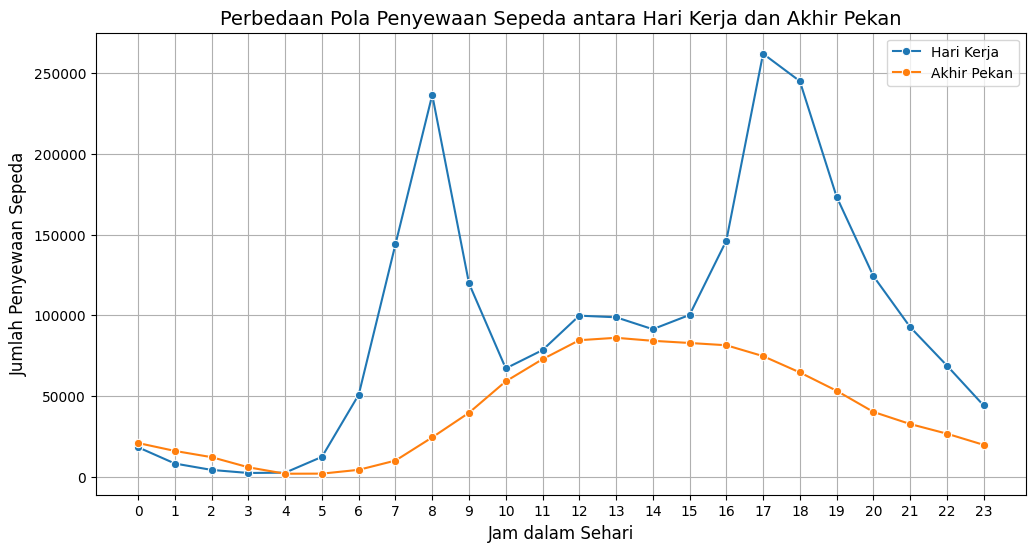

In [18]:
# Membuat salinan dataframe agar tidak mengubah aslinya
hourly_bike_sorted = hourly_bike_rentals.copy()

# Membuat ukuran figure
plt.figure(figsize=(12, 6))

# Plot data untuk hari kerja
sns.lineplot(
    data=hourly_bike_sorted[hourly_bike_sorted["workingday"] == 1]
        .groupby("hr")["cnt"].mean().reset_index(), 
    x="hr", y="cnt", 
    label="Hari Kerja", marker="o", linestyle="-"
)

# Plot data untuk akhir pekan
sns.lineplot(
    data=hourly_bike_sorted[hourly_bike_sorted["workingday"] == 0]
        .groupby("hr")["cnt"].mean().reset_index(), 
    x="hr", y="cnt", 
    label="Akhir Pekan", marker="o", linestyle="-"
)

# Judul dan label
plt.title("Perbedaan Pola Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))  # Set sumbu X dengan angka jam 0-23
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

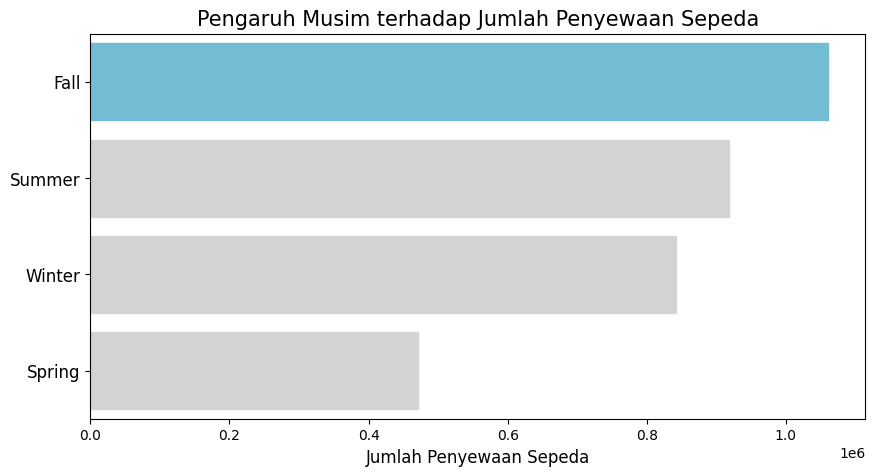

In [19]:
# Membuat salinan dataframe agar tidak mengubah aslinya
season_bike_sorted = season_bike.sort_values(by="cnt", ascending=False).copy()

# Membuat mapping dari angka musim ke nama musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Menambahkan kolom nama musim ke dataframe
season_bike_sorted["season_name"] = season_bike_sorted.index.map(season_labels)

# Membuat ukuran figure
plt.figure(figsize=(10, 5))

# Warna untuk highlight musim dengan penyewaan tertinggi
colors_ = ["#D3D3D3"] * 4  # Default semua abu-abu
max_index = season_bike_sorted["cnt"].idxmax()  # Cari musim dengan penyewaan tertinggi
max_position = season_bike_sorted.index.get_loc(max_index)  # Dapatkan posisinya
colors_[max_position] = "#72BCD4"  # Highlight musim dengan penyewaan tertinggi

# Plot bar chart
ax = sns.barplot(
    x="cnt", 
    y="season_name",  # Gunakan kolom nama musim
    data=season_bike_sorted,
)

# Mengatur warna bar satu per satu
for bar, color in zip(ax.patches, colors_):
    bar.set_color(color)

# Menambahkan judul dan label
plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda", fontsize=15)
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)

# Menampilkan plot
plt.show()

**Insight:**
- Tren penyewaan sepeda tertinggi berdasarkan hari dalam seminggu terjadi pada hari Jumat, diikuti oleh Kamis dan Sabtu.
- Pengaruh cuaca terhadap jumlah penyewaan sepeda tertinggi terjadi pada musim fall (gugur).
- Pola penyewaan sepeda pada hari kerja dan hari libur berbeda, dengan jumlah penyewaan lebih tinggi pada jam berangkat dan pulang kerja di hari kerja.

## Analisis Lanjutan (Opsional)

### Clustering Penyewaan Sepeda Berdasarkan Jam

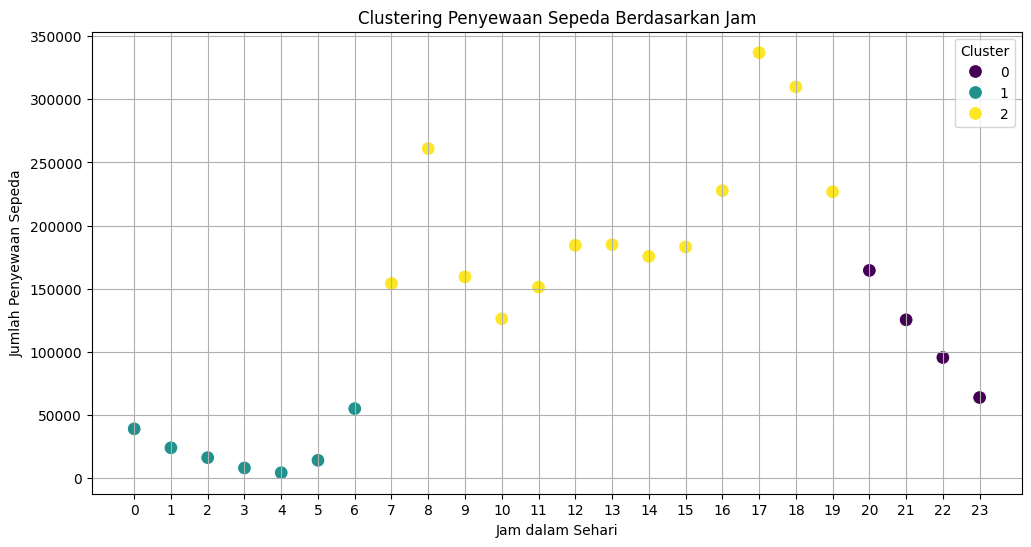

In [20]:
# Menggunakan fitur jam dan jumlah penyewaan untuk clustering
features = hourly_bike[["hr", "cnt"]]

# Normalisasi data agar skala seragam
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menerapkan K-Means Clustering dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hourly_bike["cluster"] = kmeans.fit_predict(features_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hourly_bike, x="hr", y="cnt", hue="cluster", palette="viridis", s=100)
plt.title("Clustering Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Berdasarkan hasil *clustering* penyewaan sepeda berdasarkan jam, dapat diidentifikasi tiga kelompok utama. **Cluster 0** merepresentasikan *jam sepi*, yaitu pada malam hingga dini hari (00:00 - 05:00), di mana jumlah penyewaan sepeda sangat rendah karena aktivitas pengguna berkurang. **Cluster 1** mencerminkan *jam normal*, yang terjadi pada siang hari (10:00 - 15:00), dengan tingkat penyewaan moderat karena sebagian orang menggunakan sepeda untuk aktivitas santai atau keperluan pribadi. Sementara itu, **Cluster 2** menunjukkan *jam sibuk*, yang terjadi pada pagi (07:00 - 08:00) dan sore hari (16:00 - 19:00), di mana jumlah penyewaan sepeda mencapai puncaknya. Hal ini dapat dikaitkan dengan mobilitas pekerja dan pelajar yang menggunakan sepeda sebagai sarana transportasi saat berangkat dan pulang kerja atau sekolah. Pola ini menunjukkan bahwa faktor waktu sangat berpengaruh terhadap intensitas penyewaan sepeda.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan analisis tren penyewaan sepeda berdasarkan hari dalam seminggu, jumlah penyewaan tertinggi terjadi pada hari **Jumat**, diikuti oleh **Kamis dan Sabtu**. Hal ini menunjukkan bahwa penggunaan sepeda cenderung meningkat menjelang akhir pekan, kemungkinan karena meningkatnya mobilitas pekerja serta aktivitas rekreasi. Jika ditinjau dari segmen pengguna, jumlah penyewaan oleh pengguna *registered* (terdaftar) lebih tinggi dibandingkan *casual* (tidak terdaftar) pada hampir setiap hari. Namun, pada akhir pekan, terutama Sabtu dan Minggu, jumlah penyewaan oleh pengguna *casual* meningkat secara signifikan, mengindikasikan bahwa lebih banyak orang menggunakan sepeda untuk keperluan santai atau rekreasi. Sementara itu, hari dengan jumlah penyewaan terendah adalah **Minggu**, yang kemungkinan besar disebabkan oleh berkurangnya aktivitas komuter dari pengguna terdaftar yang biasanya menggunakan sepeda untuk keperluan kerja. Pola ini menunjukkan bahwa hari dalam seminggu memiliki pengaruh signifikan terhadap tingkat penyewaan sepeda, dengan tren yang lebih tinggi menjelang akhir pekan.
- Conclution pertanyaan 2: Berdasarkan pengelompokan data berdasarkan jam dan hari kerja, pola penyewaan sepeda menunjukkan perbedaan signifikan antara hari kerja dan hari libur. Pada hari kerja, penyewaan sepeda cenderung tinggi pada **jam sibuk** (07:00 - 08:00 & 16:00 - 19:00), yang bertepatan dengan jam berangkat dan pulang kerja, menandakan bahwa banyak pengguna memanfaatkan sepeda sebagai moda transportasi utama. Sementara itu, pada **jam normal** (10:00 - 15:00), penyewaan berada pada tingkat moderat, yang kemungkinan besar berasal dari pengguna dengan jadwal fleksibel atau kebutuhan rekreasi ringan. Sebaliknya, pada **jam sepi** (00:00 - 05:00), baik di hari kerja maupun hari libur, jumlah penyewaan sangat rendah karena minimnya aktivitas. Pada akhir pekan atau hari libur, pola penyewaan menjadi lebih merata sepanjang hari, dengan peningkatan pada siang hingga sore hari, menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas santai atau rekreasi dibandingkan keperluan komuter.
- Conclution pertanyaan 3: Berdasarkan pengelompokan data, pengaruh cuaca terhadap jumlah penyewaan sepeda menunjukkan bahwa musim **fall (gugur)** memiliki jumlah penyewaan tertinggi, baik dari pengguna *casual* maupun *registered*, dengan total **1.061.129** penyewaan. Musim **summer (panas)** berada di posisi kedua dengan **918.589** penyewaan, yang kemungkinan besar disebabkan oleh kondisi cuaca yang mendukung aktivitas luar ruangan. Selanjutnya, musim **winter (dingin)** mencatat **841.613** penyewaan, yang masih cukup tinggi meskipun kondisi cuaca lebih menantang. Sementara itu, musim **spring (semi)** memiliki jumlah penyewaan terendah, yakni **471.348**, yang dapat disebabkan oleh cuaca yang kurang stabil atau curah hujan yang lebih tinggi pada periode tersebut. Pola ini menunjukkan bahwa faktor cuaca berperan penting dalam menentukan tingkat penyewaan sepeda, dengan tren penggunaan yang meningkat pada musim dengan kondisi yang lebih nyaman bagi pengguna.